#Feature Engineering

It is process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of Machine learning algorithms.

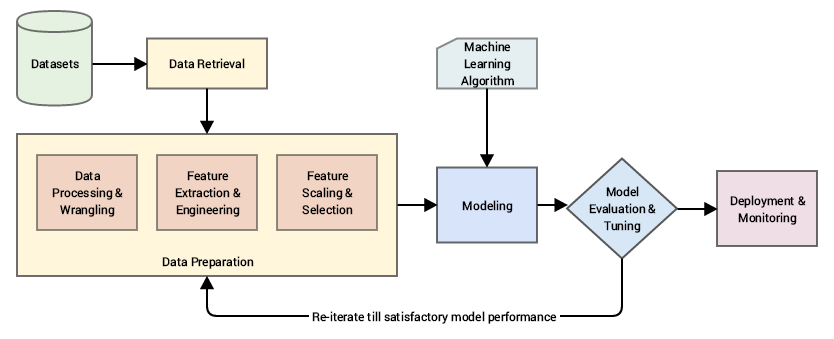

#Feature Engineering Flowchart
1. **Feature Transformation**: Changing the form of a column to get good results
    * Missing Value Imputation --> fill or drop
    * Handling Categorical Features --> encoding or binning
    * Outlier Detection
    * Feature Scaling --> Bring the features on the same scale or same range
2. **Feature Construction**: Manually create features
    * Feature Splitting --> group similar columns or splitting columns
3. **Feature Selection**: Selectively forward only important features to the model
    * Backward Elimination
    * Forward Selection
4. **Feature Extraction**: Extract new features from the given features
Curse of Dimensionality.
    * PCA
    * LDA
    * t-sne

#Normalization -- Feature Scaling

It is a technique **used for data preparation** for Machine learning. The goal of Normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

Hence, To get better results, we keep only the magnitude on a common scale and eliminate the unit.

Techniques used for Normalization:
1. Min Max Scaler
2. Mean Normalization
3. Max Absolute Scaling
4. Robust Scaling

1. **Min Max Scaler:  intuition**

Weights = 130,67,32,81,61.....100

To normalize these weightswe use the formula: 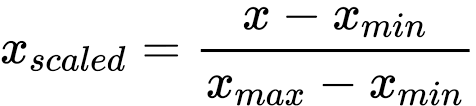

min weight = 32, max weight = 130, xi = first, second, third...weight

Then, Xscaled = 130-32/130-32 = 1

The output distribution after normalization will always be scaled between 0 and 1.

Dataset - https://www.kaggle.com/code/jayoza198/normalization-in-machine-learning/input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
files.upload()

Saving wine_data.csv to wine_data.csv


{'wine_data.csv': b'1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480\n1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295\n1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045\n1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045\n1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280\n1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320\n1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150\n1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547\n1,13.63,1.81,2.7,17.2,112,

In [3]:
df = pd.read_csv('wine_data.csv',header=None, usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic Acid']

In [4]:
df

,Class label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

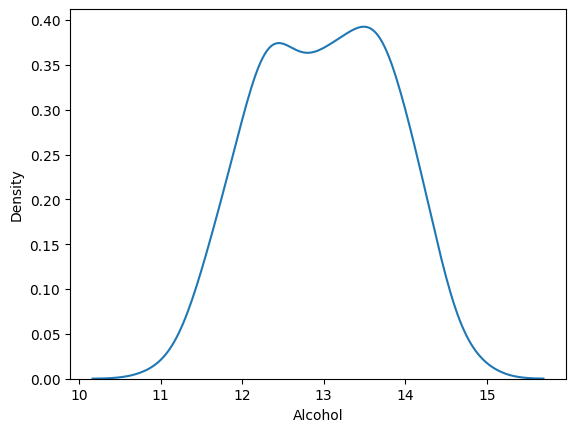

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

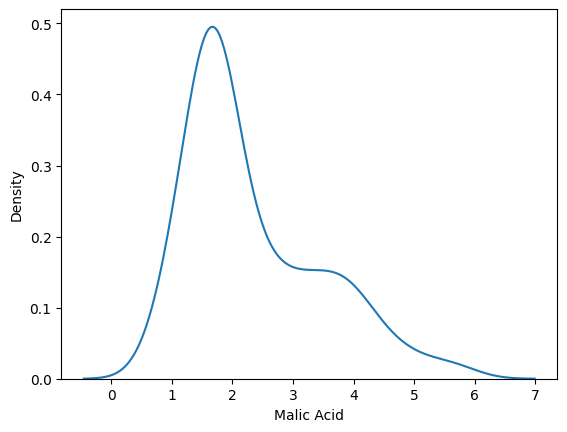

In [6]:
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

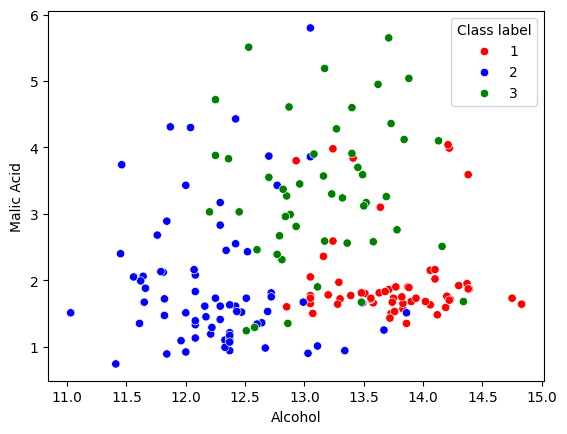

In [7]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic Acid'], hue=df['Class label'], palette=color_dict, data=df)

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop('Class label', axis=1),  #to get input cols
                                                       df['Class label'],               #output cols
                                                       test_size=0.3,
                                                       random_state=0)

In [9]:
x_train.shape , x_test.shape

((124, 2), (54, 2))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)                         #Computes the minimum and maximum values for each feature in x_train.

x_train_scaled = scaler.transform(x_train)  #Applies Min-Max scaling to x_train using the previously computed X_min and X_max.
x_test_scaled = scaler.transform(x_test)    #scaling test data as well

When we use MinMax Scaler it return a Numpy array which loses all the column names, so we have to again convert it into a Pandas Dataframe.

In [11]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns = x_test.columns)

In [12]:
np.round(x_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [13]:
display(x_train)
display(x_train_scaled)

,Alcohol,Malic Acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


,Alcohol,Malic Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


Comparing before and after Normalization



Text(0.5, 1.0, 'After scaling')

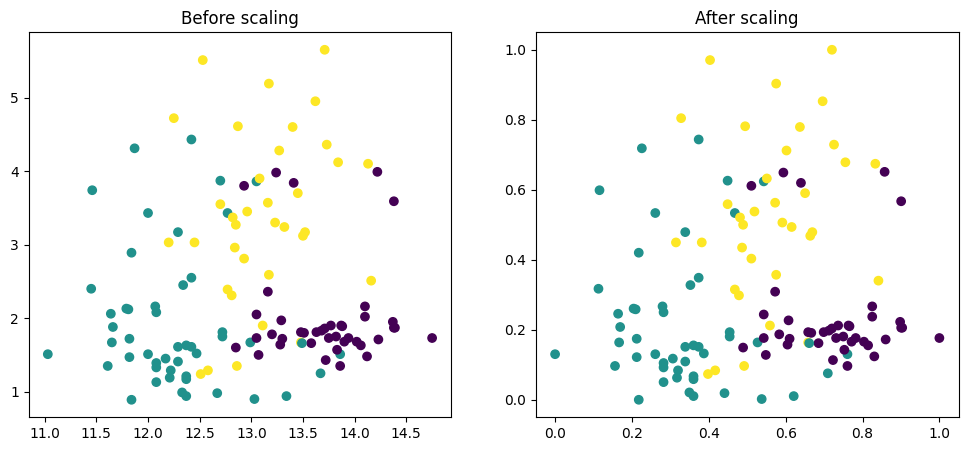

In [14]:
fig, (ax1 , ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic Acid'], c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic Acid'], c=y_train)
ax2.set_title('After scaling')


<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

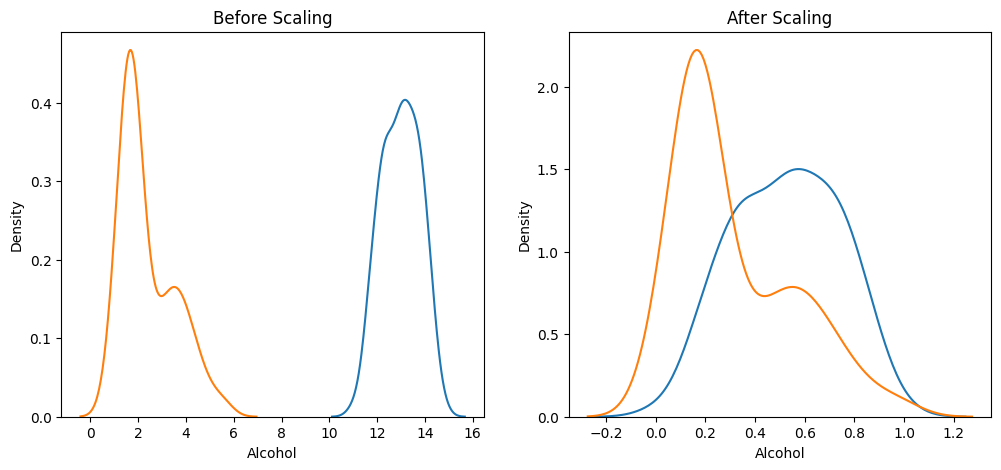

In [15]:
fig,(ax1 , ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic Acid'], ax=ax1)

#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic Acid'], ax=ax2)

2. **Mean Normalization** - use the same formula, just replace the min value with mean value of the entire feature. This is called mean centering.
Here, if the row value is smaller than mean, we get a negative normalized value. And if the row value is greater than the mean, we get a positive normalized value.

It is used when you require a centered data.

3. **Max Absolute Scalar**  - Supported by Scikit Learn as MaxAbsScaler


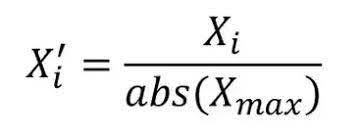

It is used when you have Sparse data (data that has lot of zero values)

4. **Robust Scaling** - Supported by sklearn as RobustScaler.

It is Robust to outliers.

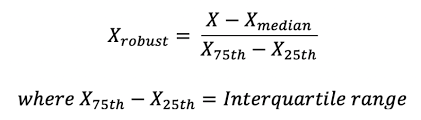

#**Difference between Normalization and Standardization**

Most problems are solved using Standardization.

MinMaxScaler is only used when we know the minimum and maximum values.

When you no idea, use Standard Scaling.

Use Robust scaling in case of Outliers.

When you have a sparse matrix, use Mean Absolute Scaling.